In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('my_data.csv')

In [48]:
data.head()

,Year,gdp,per_capita_gdp,vc_funding,vc_deals_count,rnd_exp,unemp,Inf_Mort,national_health_exp,hdi,life_exp,health_emp_count
0,1990,1.8860,-1.79,1.5,100,9.5,2.3,9.4,718.7,0.860,75.4,8210.350000
1,1991,-0.1083,-1.99,1.6,110,10.0,2.4,9.1,786.0,0.864,75.5,8617.841667
2,1992,3.5225,3.63,1.7,120,11.1,2.5,8.8,852.2,0.868,75.8,8953.966667
3,1993,2.7518,-0.77,1.8,130,12.3,2.6,8.5,914.9,0.872,75.5,9253.458333
4,1994,4.0290,1.28,1.9,140,13.5,2.7,8.2,966.4,0.876,75.7,9529.825000


In [49]:
df.tail()

,Year,gdp,per_capita_gdp,vc_funding,vc_deals_count,rnd_exp,unemp,Inf_Mort,national_health_exp,hdi,life_exp,health_emp_count
29,2019,2.4670,-0.50,8.2,420,83.0,2.483333,5.5,3756.40,0.924,78.8,16270.19167
30,2020,-2.2135,-4.68,14.3,473,91.1,5.741667,5.5,4156.30,0.920,78.9,15847.05000
31,2021,5.8002,8.01,29.2,741,102.3,3.516667,5.4,4289.10,0.920,79.0,15994.69167
32,2022,1.9355,-3.86,15.5,583,100.8,2.675000,5.4,4464.60,0.920,79.1,16305.72500
33,2023,2.5427,0.61,10.7,498,96.0,2.425000,5.5,4584.76,0.925,79.2,16954.13333


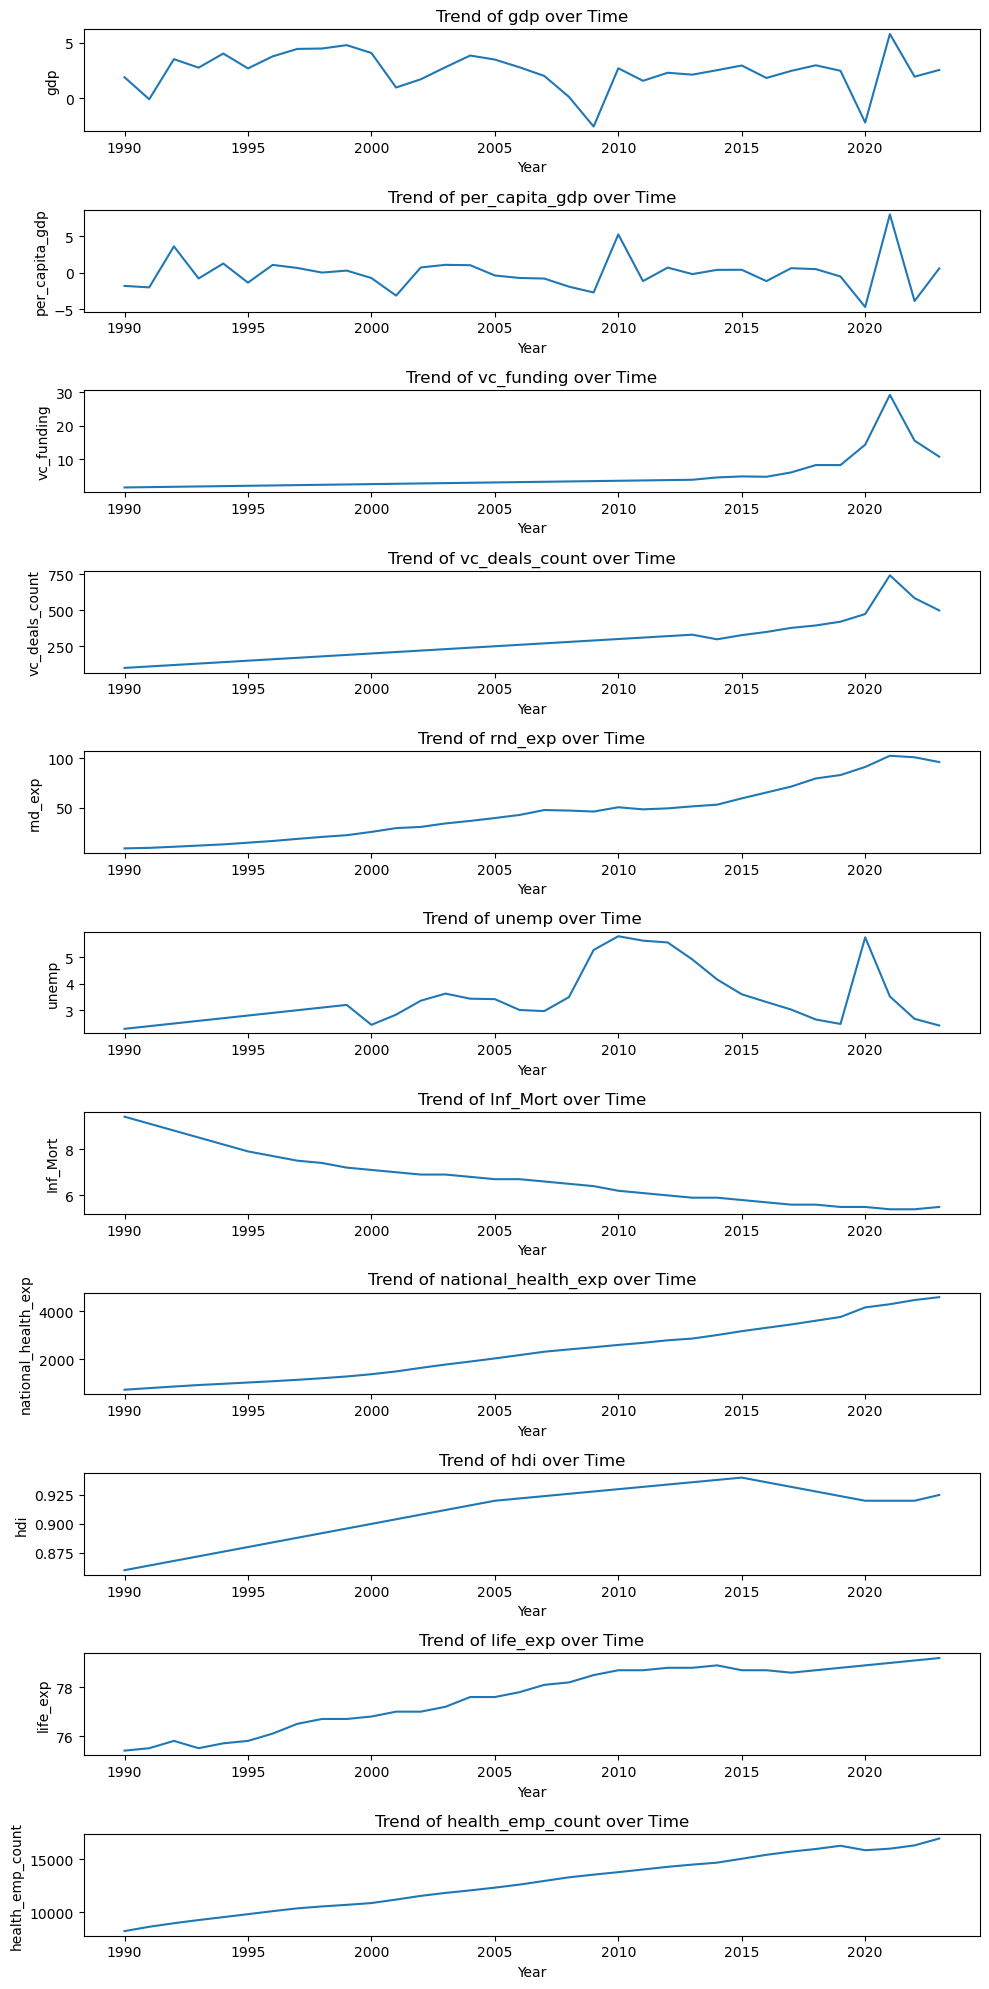

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trends over time
fig, axs = plt.subplots(len(data.columns)-1, 1, figsize=(10, 20))
for i, col in enumerate(data.columns[1:]):
    sns.lineplot(x=data['Year'], y=data[col], ax=axs[i])
    axs[i].set_title(f'Trend of {col} over Time')
plt.tight_layout()
plt.show()




In [51]:
data['bubble_burst'] = 0  # Initialize with 0 (no bubble burst)
bubble_burst_years = [2000, 2001, 2002, 2007, 2008, 2009, 2020]
data.loc[data['Year'].isin(bubble_burst_years), 'bubble_burst'] = 1

# Check the distribution of bubble burst years
data['bubble_burst'].value_counts()

bubble_burst
0    27
1     7
Name: count, dtype: int64

In [52]:
data.tail()

,Year,gdp,per_capita_gdp,vc_funding,vc_deals_count,rnd_exp,unemp,Inf_Mort,national_health_exp,hdi,life_exp,health_emp_count,bubble_burst
29,2019,2.4670,-0.50,8.2,420,83.0,2.483333,5.5,3756.40,0.924,78.8,16270.19167,0
30,2020,-2.2135,-4.68,14.3,473,91.1,5.741667,5.5,4156.30,0.920,78.9,15847.05000,1
31,2021,5.8002,8.01,29.2,741,102.3,3.516667,5.4,4289.10,0.920,79.0,15994.69167,0
32,2022,1.9355,-3.86,15.5,583,100.8,2.675000,5.4,4464.60,0.920,79.1,16305.72500,0
33,2023,2.5427,0.61,10.7,498,96.0,2.425000,5.5,4584.76,0.925,79.2,16954.13333,0


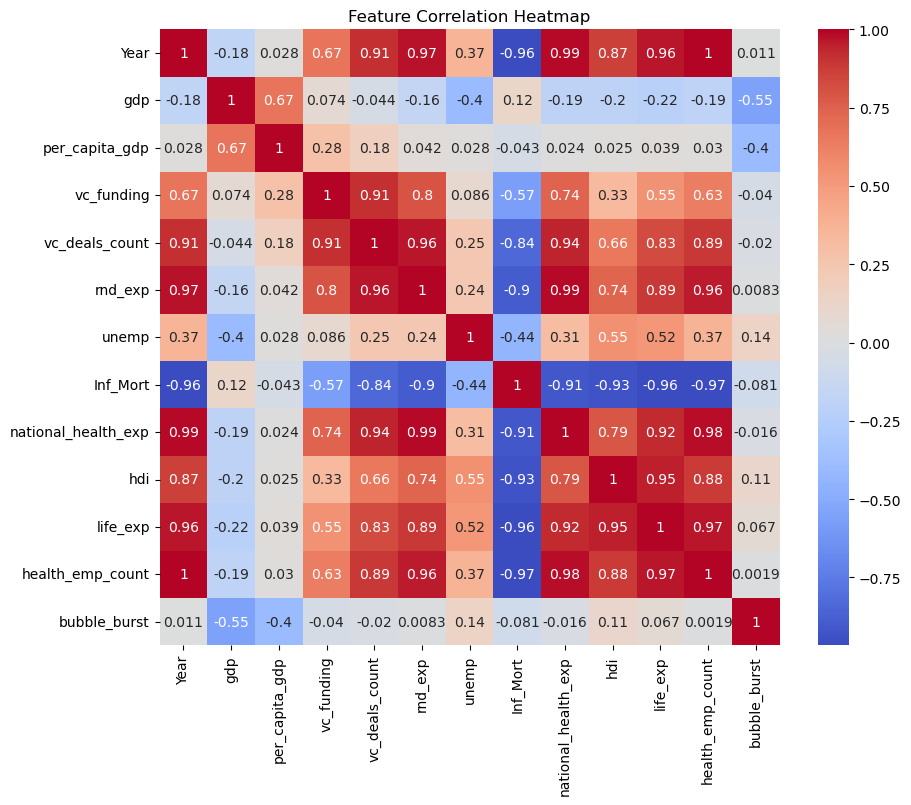

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [55]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define features and target variable
features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
X = data[features]  # Features
y = data['bubble_burst']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Initialize and train the logistic regression model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [56]:
# Extract the latest year's data (2023) for prediction
latest_year_data = data[data['Year'] == 2023][features]

# Predict whether a bubble burst will occur in 2024
burst_prediction = model.predict(latest_year_data)

# Output the prediction result
if burst_prediction[0] == 1:
    print("Prediction for 2024: A tech bubble burst is likely.")
else:
    print("Prediction for 2024: No tech bubble burst predicted.")


Prediction for 2024: No tech bubble burst predicted.


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
X = data[features]  # Features
y = data['bubble_burst']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier()

# Set hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7



In [59]:
# Predict whether a bubble burst will occur in 2024 using Random Forest
random_forest_model = RandomForestClassifier()  # Ensure you've trained this model
random_forest_model.fit(X_train, y_train)

burst_prediction_rf = random_forest_model.predict(latest_year_data)

if burst_prediction_rf[0] == 1:
    print("Random Forest Prediction for 2024: A tech bubble burst is likely.")
else:
    print("Random Forest Prediction for 2024: No tech bubble burst predicted.")


Random Forest Prediction for 2024: No tech bubble burst predicted.


In [38]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Model Accuracy:", accuracy_xgb)
print("\nXGBoost Classification Report:\n", classification_rep_xgb)


XGBoost Model Accuracy: 0.7142857142857143

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.33      1.00      0.50         1

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7



C:\Anaconda Navigator\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [60]:
# Predict whether a bubble burst will occur in 2024 using XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Ensure you've trained this model
xgb_model.fit(X_train, y_train)

burst_prediction_xgb = xgb_model.predict(latest_year_data)

if burst_prediction_xgb[0] == 1:
    print("XGBoost Prediction for 2024: A tech bubble burst is likely.")
else:
    print("XGBoost Prediction for 2024: No tech bubble burst predicted.")


XGBoost Prediction for 2024: No tech bubble burst predicted.


C:\Anaconda Navigator\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("KNN Model Accuracy:", accuracy_knn)
print("\nKNN Classification Report:\n", classification_rep_knn)


KNN Model Accuracy: 0.8571428571428571

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
# Predict whether a bubble burst will occur in 2024 using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Ensure you've trained this model
knn_model.fit(X_train, y_train)

burst_prediction_knn = knn_model.predict(latest_year_data)

if burst_prediction_knn[0] == 1:
    print("KNN Prediction for 2024: A tech bubble burst is likely.")
else:
    print("KNN Prediction for 2024: No tech bubble burst predicted.")


KNN Prediction for 2024: No tech bubble burst predicted.


In [42]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)

print("Neural Network Model Accuracy:", accuracy_nn)
print("\nNeural Network Classification Report:\n", classification_rep_nn)


C:\Anaconda Navigator\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Neural Network Model Accuracy: 0.8571428571428571

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda Navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
# Predict whether a bubble burst will occur in 2024 using Neural Network
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

burst_prediction_nn = (nn_model.predict(latest_year_data) > 0.5).astype("int32")

if burst_prediction_nn[0] == 1:
    print("Neural Network Prediction for 2024: A tech bubble burst is likely.")
else:
    print("Neural Network Prediction for 2024: No tech bubble burst predicted.")


C:\Anaconda Navigator\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Neural Network Prediction for 2024: No tech bubble burst predicted.
